In [1]:
import sys
DIR_PATH = '/Users/debryas/Desktop/PhD_work/HNL_tau_analysis/hnl-coffea-analysis'
sys.path.append(DIR_PATH)

#!/usr/bin/env python
from coffea import processor
from coffea.nanoevents import NanoAODSchema
NanoAODSchema.warn_missing_crossrefs = True
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import pickle

from helpers import files_from_path
from stitching.DY.CountEventsDYJets import CountEventsNJetsPtZ

file_dir = '/Users/debryas/cernbox/HNL/nanoV10/Run2_2018/'

inclusive_samples = ['DYJetsToLL_M-50']

exclusive_samples_NJets = [
    'DYJetsToLL_0J',
    'DYJetsToLL_1J',
    'DYJetsToLL_2J']

exclusive_samples_PtZ = [
    'DYJetsToLL_LHEFilterPtZ-0To50',
    'DYJetsToLL_LHEFilterPtZ-50To100',
    'DYJetsToLL_LHEFilterPtZ-100To250',
    'DYJetsToLL_LHEFilterPtZ-250To400',
    'DYJetsToLL_LHEFilterPtZ-400To650',
    'DYJetsToLL_LHEFilterPtZ-650ToInf']

exclusive_samples = exclusive_samples_NJets + exclusive_samples_PtZ
all_samples = inclusive_samples+exclusive_samples
nPtZbin = len(CountEventsNJetsPtZ.get_PtZ_bins())

PS_regions = []
for NJets in CountEventsNJetsPtZ.get_NJets_bins():
    for PtZbin in CountEventsNJetsPtZ.get_PtZ_bins():
        PS_regions.append(f'sumw_PtZ-{PtZbin}_Jets-{NJets}')

samples = {}
for element in all_samples:
    samples[element] = files_from_path(file_dir+element)

In [2]:
EventsNotSelected_counter = processor.run_uproot_job(
    samples,
    'EventsNotSelected',
    CountEventsNJetsPtZ(),
    processor.iterative_executor,
    {"schema": NanoAODSchema, 'workers': 6},
)

with open(f'{DIR_PATH}/results/EventsNotSelected_DYJetsToLL_NJets-PtZ.pkl', 'wb') as f:
        pickle.dump(EventsNotSelected_counter, f)

EventsSelected_counter = processor.run_uproot_job(
    samples,
    'Events',
    CountEventsNJetsPtZ(),
    processor.iterative_executor,
    {"schema": NanoAODSchema, 'workers': 6},
)

with open(f'{DIR_PATH}/results/EventsSelected_DYJetsToLL_NJets-PtZ.pkl', 'wb') as f:
        pickle.dump(EventsSelected_counter, f)

Processing: 100%|██████████| 252/252 [12:39<00:00,  3.02s/chunk]


In [2]:
with open(f'{DIR_PATH}/results/EventsNotSelected_DYJetsToLL_NJets-PtZ.pkl', 'rb') as f:
    EventsNotSelected_counter = pickle.load(f)
with open (f'{DIR_PATH}/results/EventsSelected_DYJetsToLL_NJets-PtZ.pkl', 'rb') as f:
    EventsSelected_counter = pickle.load(f)

In [3]:
#sumary sumw
print(f'| {"Samples":<35}', end='')
print(f'| {"selected events":<20}', end='')
print(f'| {"not selected events":<20}', end='')
print(f'| {"selected + notSelected":<20}', end='\n')

print(u'\u2500' * 100)
for sample in list(samples):
    print(f'| {sample:<35}', end='')
    print(f"| {round(EventsSelected_counter['sumw'][sample],1):.3e}           ", end="")
    print(f"| {round(EventsNotSelected_counter['sumw'][sample],1):.3e}           ", end='')
    print(f"| {round(EventsNotSelected_counter['sumw'][sample]+ EventsSelected_counter['sumw'][sample],1):.7e}         ", end='\n')

    print(u'\u2500' * 100)

| Samples                            | selected events     | not selected events | selected + notSelected
────────────────────────────────────────────────────────────────────────────────────────────────────
| DYJetsToLL_M-50                    | 1.671e+06           | 1.307e+08           | 1.3232200e+08         
────────────────────────────────────────────────────────────────────────────────────────────────────
| DYJetsToLL_0J                      | 3.957e+05           | 6.910e+07           | 6.9493624e+07         
────────────────────────────────────────────────────────────────────────────────────────────────────
| DYJetsToLL_1J                      | 1.505e+06           | 4.175e+07           | 4.3252004e+07         
────────────────────────────────────────────────────────────────────────────────────────────────────
| DYJetsToLL_2J                      | 7.197e+05           | 1.307e+07           | 1.3793541e+07         
──────────────────────────────────────────────────────────────────

In [4]:
P_i_j = {}

for sample in list(samples):
    vector = []
    for PS_region in PS_regions:
        vector.append((EventsNotSelected_counter[PS_region][sample]+ EventsSelected_counter[PS_region][sample])/(EventsNotSelected_counter['sumw'][sample]+EventsSelected_counter['sumw'][sample]))
    P_i_j[sample] = np.array(vector)

In [5]:
#sumary tab xsec
for NJets in CountEventsNJetsPtZ.get_NJets_bins():
    print('')
    print('NJets =' + NJets)
    print(f'| {"Samples":<35}', end='')
    for PtZbin in CountEventsNJetsPtZ.get_PtZ_bins():
        print(f'| {"PtZ= "+PtZbin+" ":<13}', end='')
    print(' ', end='\n')
    print(u'\u2500' * 140)

    for sample in list(samples):
        print(f'| {sample:<35}', end='')
        for i in np.arange(nPtZbin):
            print(f'| {round(P_i_j[sample][nPtZbin*int(NJets)+i],10):<12} ', end='')
        print(' ', end='\n')

        print(u'\u2500' * 140)


NJets =0
| Samples                            | PtZ= 0       | PtZ= 0to50   | PtZ= 50to100 | PtZ= 100to250 | PtZ= 250to400 | PtZ= 400to650 | PtZ= 650toInf  
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| DYJetsToLL_M-50                    | 0.6889460024 | 0.1049187564 | 8.45513e-05  | 2.7206e-06   | 2.27e-08     | 7.6e-09      | 0.0           
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| DYJetsToLL_0J                      | 0.8671915858 | 0.1326997424 | 0.0001053046 | 3.3384e-06   | 2.88e-08     | 0.0          | 0.0           
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| DYJetsToLL_1J                      | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.0          | 0.

In [6]:
N_sumw = {}
for sample in list(samples):
    N_sumw[sample] = EventsNotSelected_counter['sumw'][sample]+ EventsSelected_counter['sumw'][sample]

N_j = []
for exclusive_sample in exclusive_samples:
    N_j.append(N_sumw[exclusive_sample])

s = []
for i in range(len(PS_regions)):
    P_j = []
    for exclusive_sample in exclusive_samples:
        P_j.append(P_i_j[exclusive_sample][i])
        
    if P_i_j['DYJetsToLL_M-50'][i] == 0:
        #PS not populated by events
        s.append(0)
    else:
        s.append( (P_i_j['DYJetsToLL_M-50'][i]*N_sumw['DYJetsToLL_M-50']) / (P_i_j['DYJetsToLL_M-50'][i]*N_sumw['DYJetsToLL_M-50'] + sum(np.array(P_j)*np.array(N_j))) )

In [7]:
print(f'| {"                 ":<10}', end='')
for PtZbin in CountEventsNJetsPtZ.get_PtZ_bins():
    print(f'| {"PtZ="+PtZbin+" ":<13}', end='')
print(' ', end='\n')
print(u'\u2500' * 170)

for NJets in CountEventsNJetsPtZ.get_NJets_bins():
    print(f'| NJets= {NJets:<10}', end='')
    for i in np.arange(nPtZbin):
        print(f'| {round(s[nPtZbin*int(NJets)+i],6):<12} ', end='')
    print(' ', end='\n')

    print(u'\u2500' * 170)


|                  | PtZ=0        | PtZ=0to50    | PtZ=50to100  | PtZ=100to250 | PtZ=250to400 | PtZ=400to650 | PtZ=650toInf  
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| NJets= 0         | 0.602024     | 0.20181      | 0.127236     | 0.058728     | 0.00531      | 0.023256     | 0             
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| NJets= 1         | 0            | 0.154265     | 0.106213     | 0.051541     | 0.00747      | 0.005896     | 0.000615      
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
| NJets= 2         | 0            | 0.163096     | 0.111647     | 0.054416     | 0.007904     | 0.006444     

In [8]:
import csv

with open(f'{DIR_PATH}/results/stitching_weights_2D_DYtoLL.csv', 'w') as f:
    writer = csv.writer(f)
    first_line = ['']
    for PtZbin in CountEventsNJetsPtZ.get_PtZ_bins():
        first_line.append('PtZ='+PtZbin)
    writer.writerow(first_line)
    i= 0
    for NJets in CountEventsNJetsPtZ.get_NJets_bins():
        writer.writerow(['NJets='+NJets, s[i+0], s[i+1], s[i+2], s[i+3], s[i+4], s[i+5], s[i+6]])
        i = i+nPtZbin
    f.close()

In [8]:
from stitching.DY.Analysis_stitching2D_DY import Analysis_stitching2D_DY
from stitching.DY.Analysis_stitching2D_DY_inclOnly import Analysis_stitching2D_DY_inclOnly

inclOnly_samples = {'DYJetsToLL_M-50': ['/Users/debryas/cernbox/HNL/nanoV10/Run2_2018/DYJetsToLL_M-50/nano_3.root',
                                        '/Users/debryas/cernbox/HNL/nanoV10/Run2_2018/DYJetsToLL_M-50/nano_2.root',
                                        '/Users/debryas/cernbox/HNL/nanoV10/Run2_2018/DYJetsToLL_M-50/nano_4.root',
                                        '/Users/debryas/cernbox/HNL/nanoV10/Run2_2018/DYJetsToLL_M-50/nano_1.root',
                                        '/Users/debryas/cernbox/HNL/nanoV10/Run2_2018/DYJetsToLL_M-50/nano_0.root']}

result = processor.run_uproot_job(
    samples,
    "Events",
    Analysis_stitching2D_DY(s),
    processor.iterative_executor, 
    {"schema": NanoAODSchema, 'workers': 6},
)

with open(f'{DIR_PATH}/results/result_Analysis_stitching2D_DY.pkl', 'wb') as f:
    pickle.dump(result, f)

result_incl = processor.run_uproot_job(
    inclOnly_samples,
    "Events",
    Analysis_stitching2D_DY_inclOnly(),
    processor.iterative_executor, 
    {"schema": NanoAODSchema, 'workers': 6},
)

with open(f'{DIR_PATH}/results/result_Analysis_stitching2D_DY_inclOnly.pkl', 'wb') as f:
    pickle.dump(result_incl, f)

Processing: 100%|██████████| 34/34 [02:17<00:00,  4.04s/chunk]


In [9]:
from coffea import hist
from cycler import cycler

with open(f'{DIR_PATH}/results/result_Analysis_stitching2D_DY.pkl', 'rb') as f:
    result_all = pickle.load(f)
with open (f'{DIR_PATH}/results/result_Analysis_stitching2D_DY_inclOnly.pkl', 'rb') as f:
    result_inclOnly = pickle.load(f)

/Users/debryas/opt/anaconda3/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/Users/debryas/opt/anaconda3/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/Users/debryas/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:873: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/Users/debryas/opt/anaconda3/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/Users/debryas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


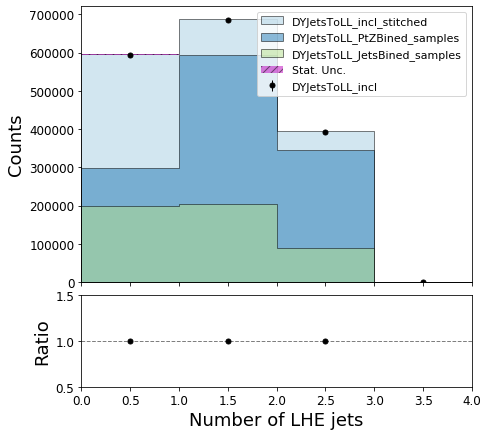

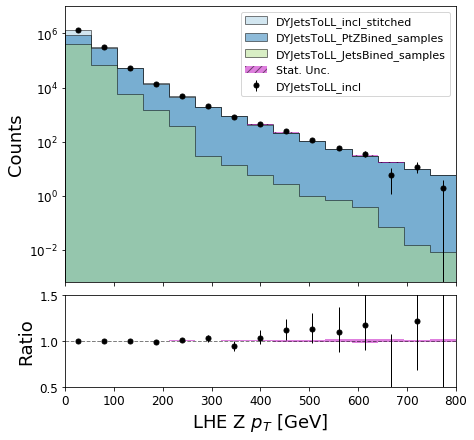

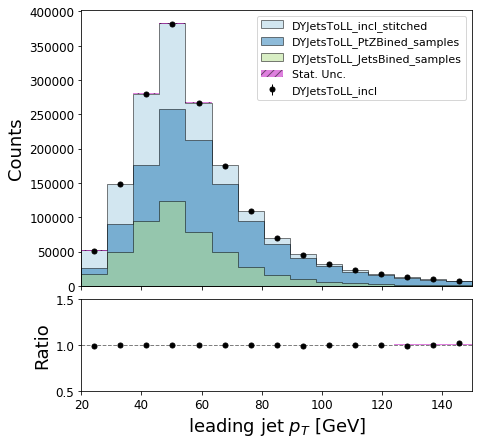

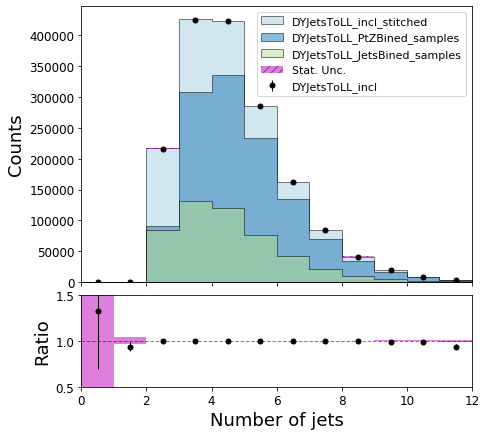

In [10]:
var = ['NpNLO','Vpt','pt_leading_jet','NJet']
for var_to_plot in var:
    hist_stitched = result_all[var_to_plot]
    hist_incl = result_inclOnly[var_to_plot]

    mapping = {
        'DYJetsToLL_incl_stitched': inclusive_samples,
        'DYJetsToLL_JetsBined_samples':exclusive_samples_NJets,
        'DYJetsToLL_PtZBined_samples': exclusive_samples_PtZ,
    }
    hist_stitched = hist_stitched.group("ds", hist.Cat("ds", "Combined samples"), mapping)

    mapping = {
        'DYJetsToLL_incl': inclusive_samples
    }
    hist_incl = hist_incl.group("ds", hist.Cat("ds", "Combined samples"), mapping)


    if var_to_plot[0:2] == 'Vp':
        hist_incl = hist_incl.rebin("Vpt", hist.Bin("Vpt", r"LHE Z $p_{T}$ [GeV]", 15, 0, 800))
        hist_stitched = hist_stitched.rebin("Vpt", hist.Bin("Vpt", r"LHE Z $p_{T}$ [GeV]", 15, 0, 800))


    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    })

    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(7,7),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )

    fig.subplots_adjust(hspace=.07)

    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
    ax.set_prop_cycle(cycler(color=colors))

    fill_opts = {
        'edgecolor': (0,0,0,0.3),
        'alpha': 0.5
    }

    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }

    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'm',
        'alpha': 0.5,
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }

    #incl samples
    hist.plot1d(
        hist_incl,
        overlay="ds",
        ax=ax,
        clear=False,
        error_opts=data_err_opts,
    )

    #stitched samples
    hist.plot1d(
        hist_stitched,
        overlay="ds",
        ax=ax,
        clear=False,
        stack=True,
        line_opts=None,
        fill_opts=fill_opts,
        error_opts=error_opts
    )

    ax.set_xlabel(None)
    if var_to_plot[0:2] == 'Vp':
        ax.set_yscale('log')
        ax.set_ylim(0,10000000)

    leg = ax.legend(prop={'size': 11}, loc= 'upper right')

    # now we build the ratio plot

    hist.plotratio(
        num=hist_incl.sum("ds"),
        denom=hist_stitched.sum("ds"),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={'facecolor': 'm','alpha': 0.5},
        guide_opts={},
        unc='num'
    )

    rax.set_ylabel('Ratio')
    rax.set_ylim(0.5,1.5)
    #rax.set_xlim(0, xlim)
    plt.savefig(f'{DIR_PATH}/figures/stitching/DY/stitchedVSincl_' + var_to_plot + '.pdf',format='pdf')
